In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

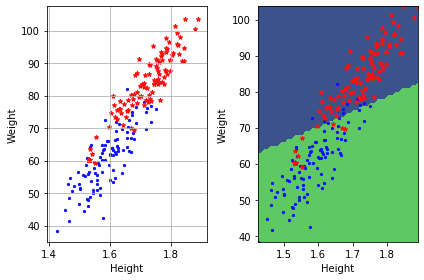

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    loss, w = least_squares(y[:,0], tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return np.exp(t)/(1 + np.exp(t))

In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    x_nw = tx.dot(w)
    return np.sum(np.log(1 + np.exp(x_nw)) - y*x_nw)

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return tx.T.dot(np.apply_along_axis(sigmoid, 0, tx.dot(w)) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    grad = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * grad
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.54589280875939
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.964870635605585
Current iteration=500, loss=40.920089458713036
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.89616496609549
Current iteration=900, loss=40.8953375338211
Current iteration=1000, loss=40.895021964119
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328358
Current iteration=1500, loss=40.8948272728955
loss=40.89482664256953


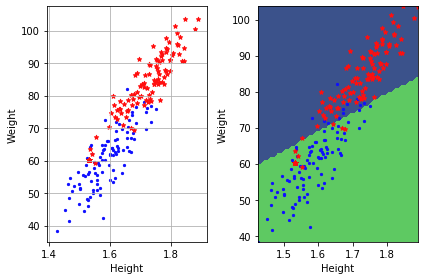

In [8]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [9]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    x_nw_sig = np.apply_along_axis(sigmoid, 0, tx.dot(w))
    S = np.diag((x_nw_sig * (1 - x_nw_sig))[:,0])
    return tx.T.dot(S).dot(tx)

Write a function below to return loss, gradient, and hessian.

In [10]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)

### Using Newton's method
Use Newton's method for logistic regression.

In [11]:
def learning_by_newton_method(y, tx, w, lambda_):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, grad, hess = logistic_regression(y, tx, w) 
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - lambda_ * np.linalg.inv(hess).dot(grad)
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=126.31098316846277
Current iteration=2, the loss=116.17884131836637
Current iteration=3, the loss=107.63603770167279
Current iteration=4, the loss=100.30205497477118
Current iteration=5, the loss=93.92045949357012
Current iteration=6, the loss=88.31062658882068
Current iteration=7, the loss=83.34061997995857
Current iteration=8, the loss=78.91107491445942
Current iteration=9, the loss=74.9451750545951
Current iteration=10, the loss=71.38217682387335
Current iteration=11, the loss=68.17308537750938
Current iteration=12, the loss=65.27768184568598
Current iteration=13, the loss=62.66242563531864
Current iteration=14, the loss=60.29893947109507
Current iteration=15, the loss=58.162892820633104
Current iteration=16, the loss=56.23316456560802
Current iteration=17, the loss=54.491206131845786
Current iteration=18, the loss=52.9205517774463
Current iteration=19, the loss=51.5064391340143
Current iteration=20, the 

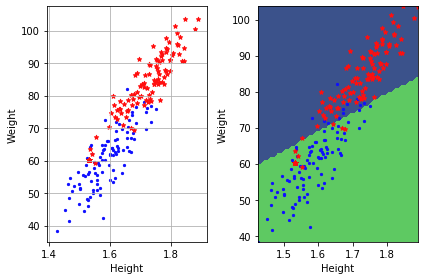

In [12]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, lambda_)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [13]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w) + lambda_/2*np.linalg.norm(w)**2
    grad = calculate_gradient(y, tx, w) + lambda_*w
    hess = calculate_hessian(y, tx, w) + np.diag(lambda_ * np.ones(w.shape))
    return loss, grad, hess

In [14]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    loss, grad, _ = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * grad
    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.6076521740577
Current iteration=200, loss=41.75849311809509
Current iteration=300, loss=41.34251932728577
Current iteration=400, loss=41.22304151059024
Current iteration=500, loss=41.18476840871177
Current iteration=600, loss=41.17179994705527
Current iteration=700, loss=41.16726733045477
Current iteration=800, loss=41.1656547125231
Current iteration=900, loss=41.16507496597565
Current iteration=1000, loss=41.16486525132476
Current iteration=1100, loss=41.164789109489256
Current iteration=1200, loss=41.164761403050996
Current iteration=1300, loss=41.16475130779127
Current iteration=1400, loss=41.164747626471254
loss=40.90016893148216


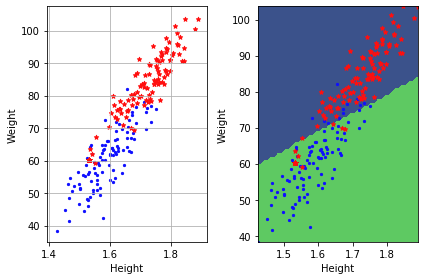

In [15]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.01
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)